In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [105]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseValue'] = california.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


##Column Description
1. MedInc - Median Income in 10s of thousand of dollars -> The average income of people living in that area.
2. HouseAge - Median House age -> The average age of houses in that area.
3. AveRooms - Average no of Rooms per household -> The total rooms divided by total households.
4. AveBeds - Average no of bedsroom per household -> The total bedrooms devided by total households
5. Population - Total Population
6. AveOccup - Average Household Size (people per household) -> The population divided by number of households — tells you how crowded the area is.
7. Latitude - Tells where the area is located north–south in California.
8. Longitude - Tells where the area is located east–west in California.
9. MedHouseValue - Median House Value in 100s of thousand of dollars -> The average value of the house

### Each Row shows the data of a block or a Neighbourhood.

In [106]:
df_Copy = df.copy()
df_Copy

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [107]:
df_Copy.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [108]:
df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [109]:
df_Copy[df_Copy['AveRooms']>140]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.1,5.00001


###Columns
**Numerical**
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude
9. MedHouseValue -> Target Column




---


#Univariate Analysis
**Column MedInc**
1. Data is highly positively Skewed
2. Upper outliers Present in the Column

**Column HouseAge**
1. Data is not skewed
2. No Outliers Present

**Column AveRooms**
1. Data is extremely Skewed
2. Extreme Outliers Are Present in the dataset

**Column AveBedrms**
1. Data is extremely Skewed
2. Extreme Outliers Are Present in the dataset

**Column Population**
1. Data is extremely Skewed
2. Extreme Outliers Are Present in the dataset

**Column AveOccup**
1. data is very extremely Skewed
2. Extreme Outliers Are Present in the dataset

**Column Latitude**
1. Data is moderately Skewed
2. Outliers are not Present in the dataset

**Column Longitude**
1. Data is moderately Skewed
2. Outliears are not present in the dataset

**Column MedHouseValue**
1. Data is Skewed
2. Outliers are present in the dataset



---


#MedInc(Univariate)

In [110]:
df_Copy['MedInc'].describe()

,MedInc
count,20640.000000
mean,3.870671
std,1.899822
min,0.499900
25%,2.563400
50%,3.534800
75%,4.743250
max,15.000100


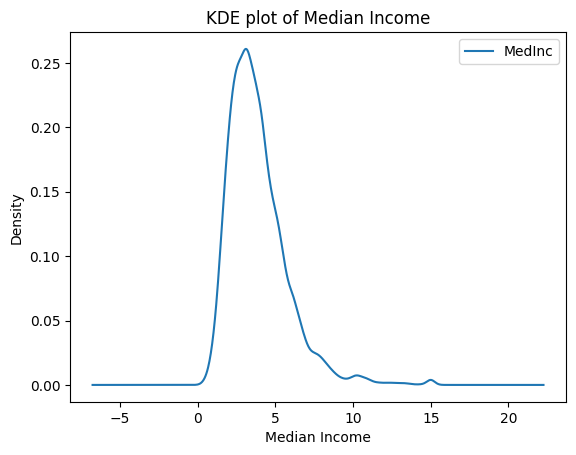

In [111]:
df_Copy['MedInc'].plot(kind='kde')
plt.title("KDE plot of Median Income")
plt.xlabel('Median Income')
plt.legend()
plt.show()

In [112]:
df_Copy['MedInc'].skew()

np.float64(1.6466567021344465)

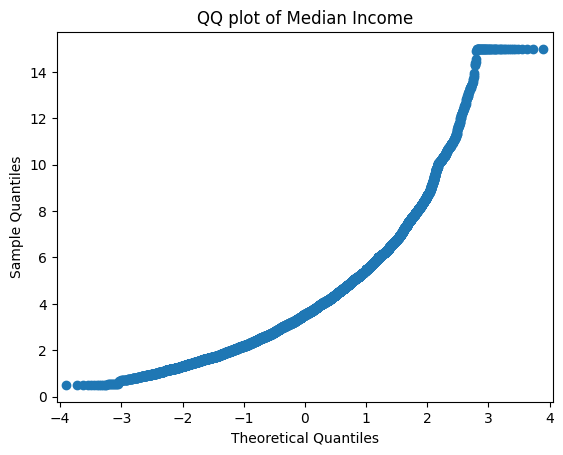

In [113]:
sm.qqplot(df_Copy['MedInc'])
plt.title('QQ plot of Median Income')
plt.show()

/tmp/ipython-input-2555693122.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


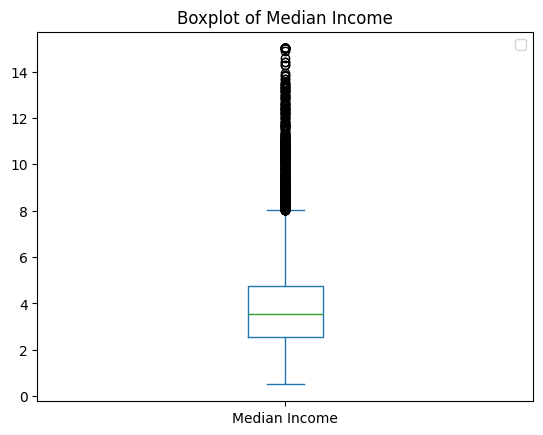

In [114]:
df_Copy['MedInc'].plot(kind='box', label = 'Median Income')
plt.title("Boxplot of Median Income")
plt.legend()
plt.show()

#HouseAge(Univariate)

In [115]:
df_Copy['HouseAge'].describe()

,HouseAge
count,20640.000000
mean,28.639486
std,12.585558
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


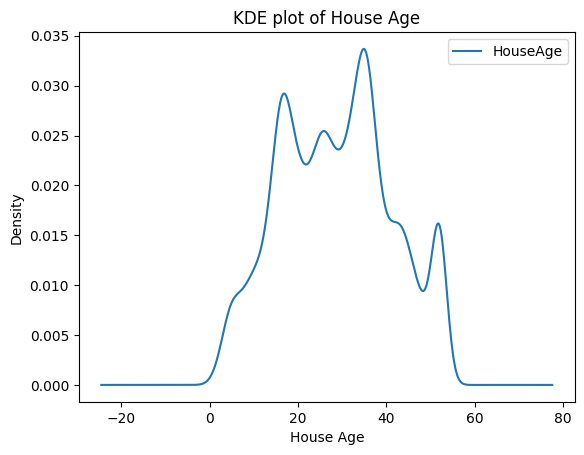

In [116]:
df_Copy['HouseAge'].plot(kind='kde')
plt.title("KDE plot of House Age")
plt.xlabel('House Age')
plt.legend()
plt.show()

In [117]:
df_Copy['HouseAge'].skew()

np.float64(0.060330637599136865)

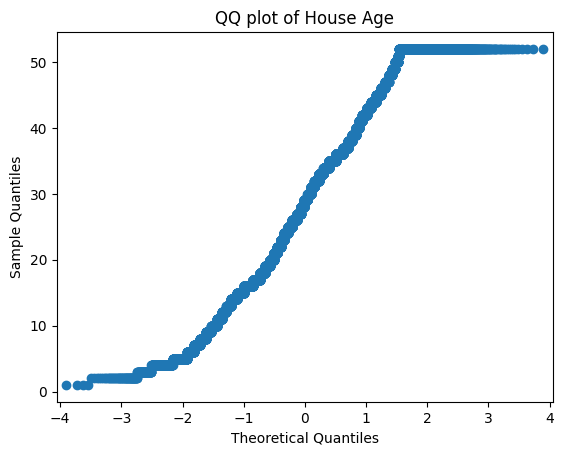

In [118]:
sm.qqplot(df_Copy['HouseAge'])
plt.title('QQ plot of House Age')
plt.show()

/tmp/ipython-input-3138728021.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


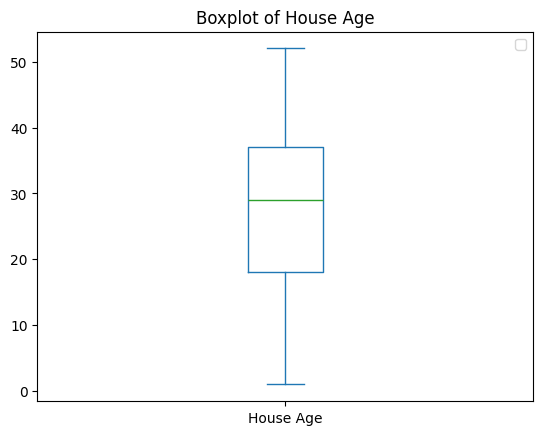

In [119]:
df_Copy['HouseAge'].plot(kind='box', label = 'House Age')
plt.title("Boxplot of House Age")
plt.legend()
plt.show()



---


#AveRooms(Univariate)

In [120]:
df_Copy['AveRooms'].describe()

,AveRooms
count,20640.000000
mean,5.429000
std,2.474173
min,0.846154
25%,4.440716
50%,5.229129
75%,6.052381
max,141.909091


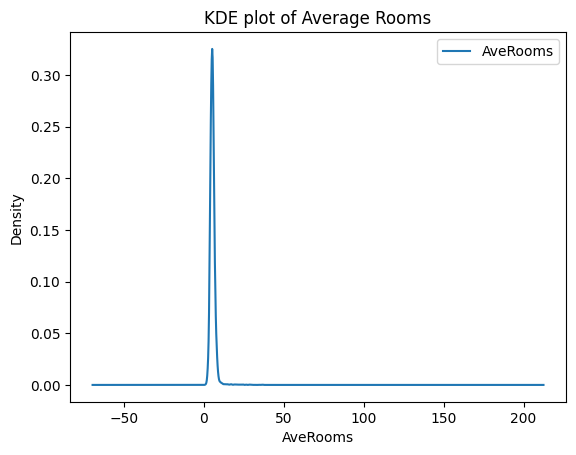

In [121]:
df_Copy['AveRooms'].plot(kind='kde')
plt.title("KDE plot of Average Rooms")
plt.xlabel('AveRooms')
plt.legend()
plt.show()

In [122]:
df_Copy['AveRooms'].skew()

np.float64(20.697868956710646)

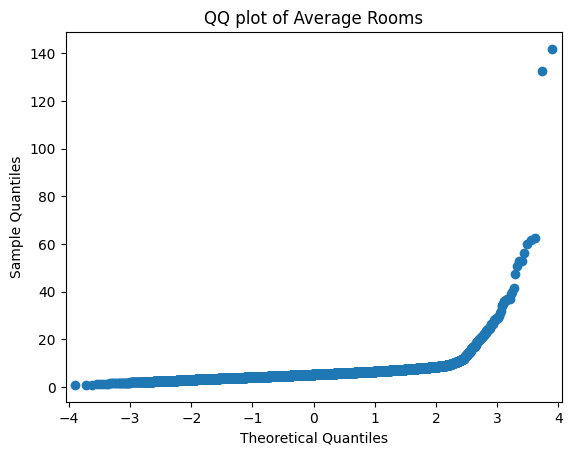

In [123]:
sm.qqplot(df_Copy['AveRooms'])
plt.title('QQ plot of Average Rooms')
plt.show()

/tmp/ipython-input-2532794548.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


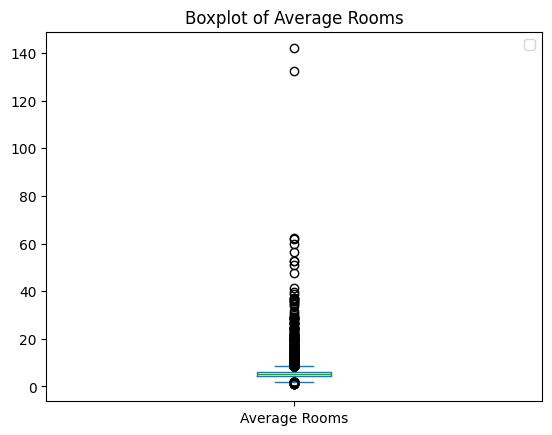

In [124]:
df_Copy['AveRooms'].plot(kind='box', label = 'Average Rooms')
plt.title("Boxplot of Average Rooms")
plt.legend()
plt.show()



---


#AveBedrms(Univariate)


In [125]:
df_Copy['AveBedrms'].describe()

,AveBedrms
count,20640.000000
mean,1.096675
std,0.473911
min,0.333333
25%,1.006079
50%,1.048780
75%,1.099526
max,34.066667


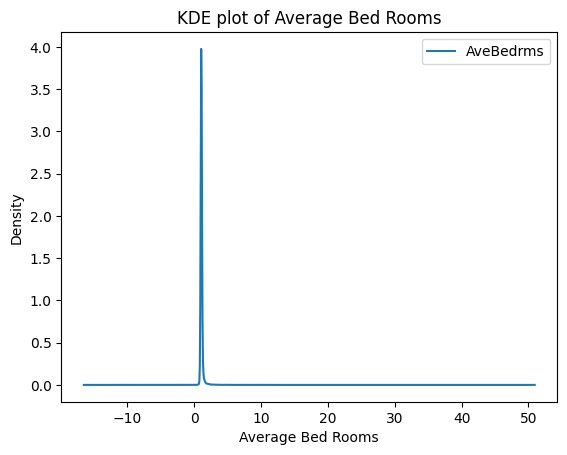

In [126]:
df_Copy['AveBedrms'].plot(kind='kde')
plt.title("KDE plot of Average Bed Rooms")
plt.xlabel('Average Bed Rooms')
plt.legend()
plt.show()

In [127]:
df_Copy['AveBedrms'].skew()

np.float64(31.316956246782663)

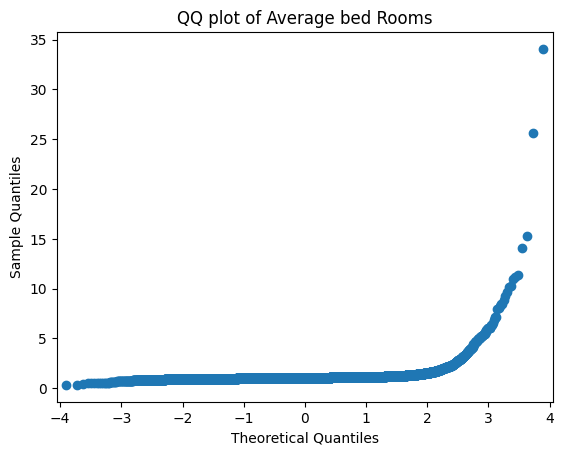

In [128]:
sm.qqplot(df_Copy['AveBedrms'])
plt.title('QQ plot of Average bed Rooms')
plt.show()

/tmp/ipython-input-3740129705.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


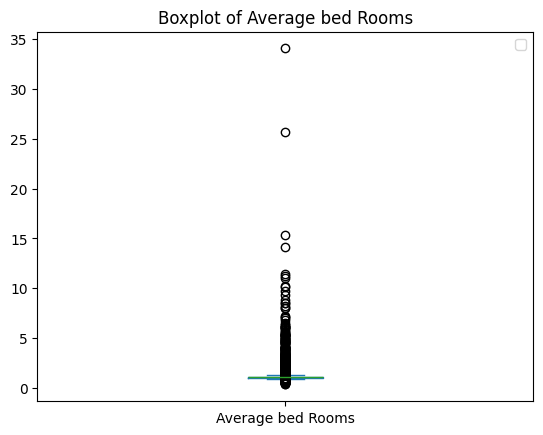

In [129]:
df_Copy['AveBedrms'].plot(kind='box', label = 'Average bed Rooms')
plt.title("Boxplot of Average bed Rooms")
plt.legend()
plt.show()



---

#Population(Univariate)

In [130]:
df_Copy['Population'].describe()

,Population
count,20640.000000
mean,1425.476744
std,1132.462122
min,3.000000
25%,787.000000
50%,1166.000000
75%,1725.000000
max,35682.000000


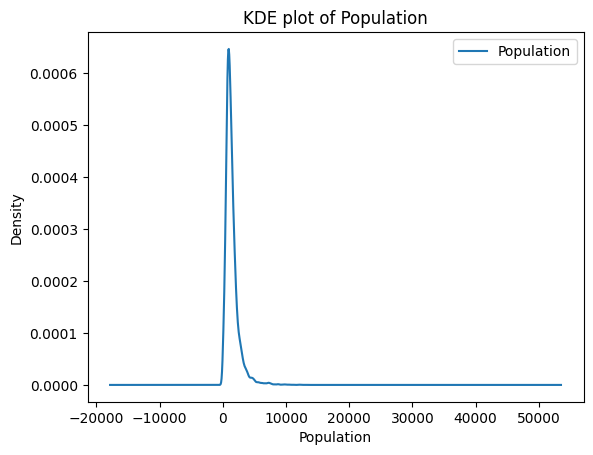

In [131]:
df_Copy['Population'].plot(kind='kde')
plt.title("KDE plot of Population")
plt.xlabel('Population')
plt.legend()
plt.show()

In [132]:
df_Copy['Population'].skew()

np.float64(4.93585822672712)

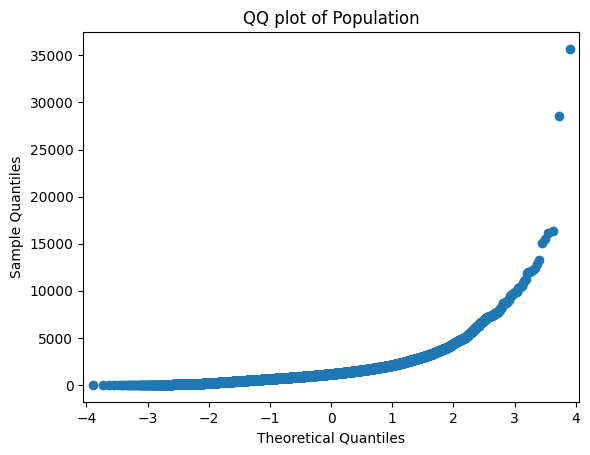

In [133]:
sm.qqplot(df_Copy['Population'])
plt.title('QQ plot of Population')
plt.show()

/tmp/ipython-input-491004095.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


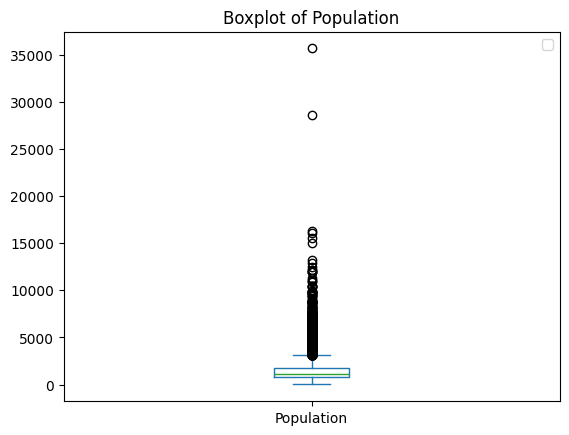

In [134]:
df_Copy['Population'].plot(kind='box', label = 'Population')
plt.title("Boxplot of Population")
plt.legend()
plt.show()



---
#AvaOccup(Univariate)


In [135]:
df_Copy['AveOccup'].describe()

,AveOccup
count,20640.000000
mean,3.070655
std,10.386050
min,0.692308
25%,2.429741
50%,2.818116
75%,3.282261
max,1243.333333


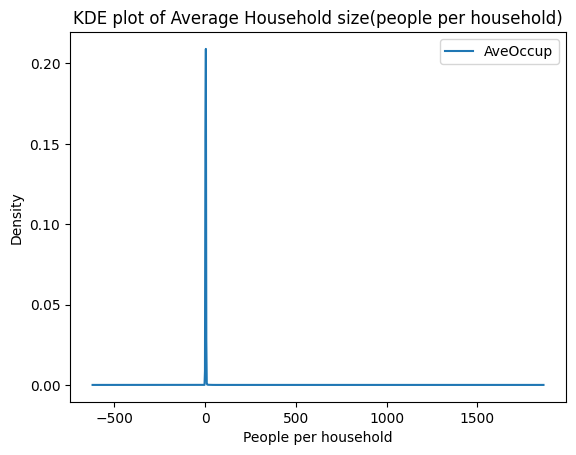

In [136]:
df_Copy['AveOccup'].plot(kind='kde')
plt.title("KDE plot of Average Household size(people per household)")
plt.xlabel('People per household')
plt.legend()
plt.show()

In [137]:
df_Copy['AveOccup'].skew()

np.float64(97.63956096369479)

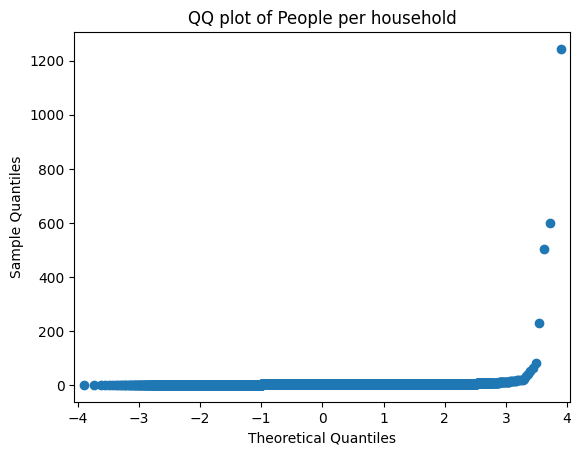

In [138]:
sm.qqplot(df_Copy['AveOccup'])
plt.title('QQ plot of People per household')
plt.show()

/tmp/ipython-input-2314115946.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


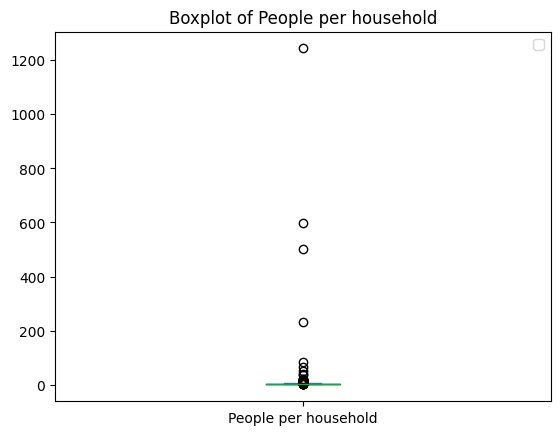

In [139]:
df_Copy['AveOccup'].plot(kind='box', label = 'People per household')
plt.title("Boxplot of People per household")
plt.legend()
plt.show()



---
#Latitude(Univariate)


In [140]:
df_Copy['Latitude'].describe()

,Latitude
count,20640.000000
mean,35.631861
std,2.135952
min,32.540000
25%,33.930000
50%,34.260000
75%,37.710000
max,41.950000


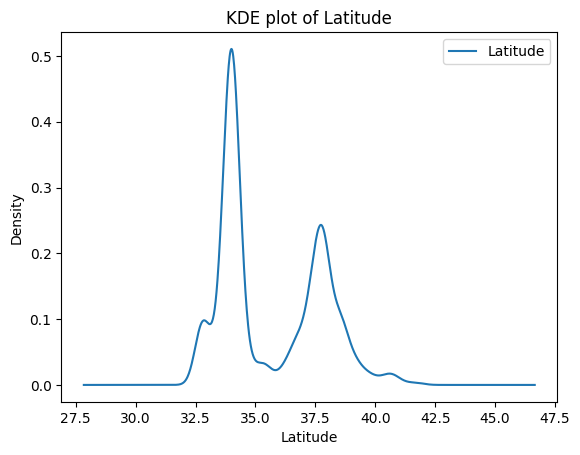

In [141]:
df_Copy['Latitude'].plot(kind='kde')
plt.title("KDE plot of Latitude")
plt.xlabel('Latitude')
plt.legend()
plt.show()

In [142]:
df_Copy['Latitude'].skew()

np.float64(0.46595300370997006)

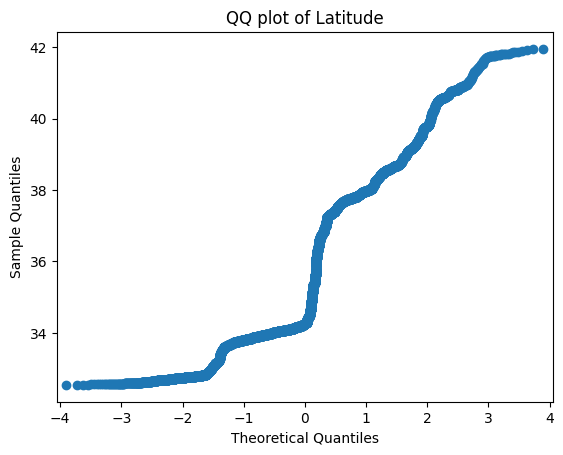

In [143]:
sm.qqplot(df_Copy['Latitude'])
plt.title('QQ plot of Latitude')
plt.show()

/tmp/ipython-input-1874074844.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


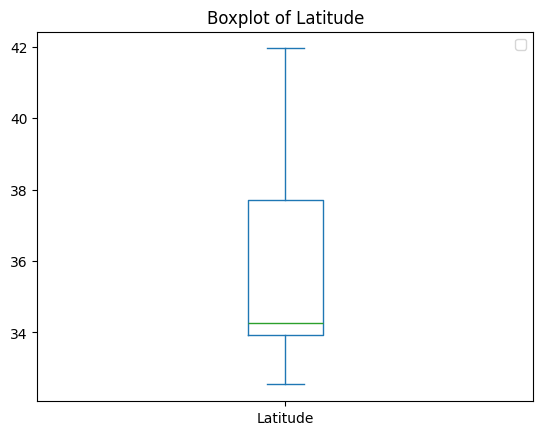

In [144]:
df_Copy['Latitude'].plot(kind='box', label = 'Latitude')
plt.title("Boxplot of Latitude")
plt.legend()
plt.show()



---
#Longitude(Univariate)


In [145]:
df_Copy['Longitude'].describe()

,Longitude
count,20640.000000
mean,-119.569704
std,2.003532
min,-124.350000
25%,-121.800000
50%,-118.490000
75%,-118.010000
max,-114.310000


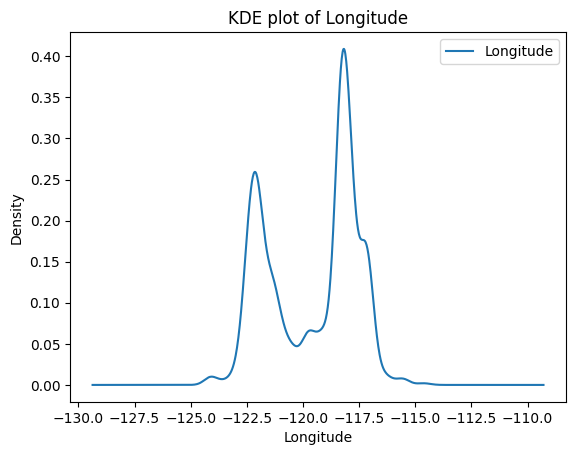

In [146]:
df_Copy['Longitude'].plot(kind='kde')
plt.title("KDE plot of Longitude")
plt.xlabel('Longitude')
plt.legend()
plt.show()

In [147]:
df_Copy['Longitude'].skew()

np.float64(-0.2978012079524362)

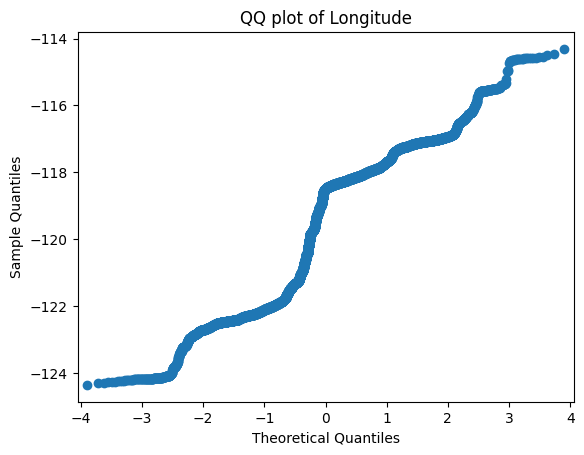

In [148]:
sm.qqplot(df_Copy['Longitude'])
plt.title('QQ plot of Longitude')
plt.show()

/tmp/ipython-input-1544333512.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


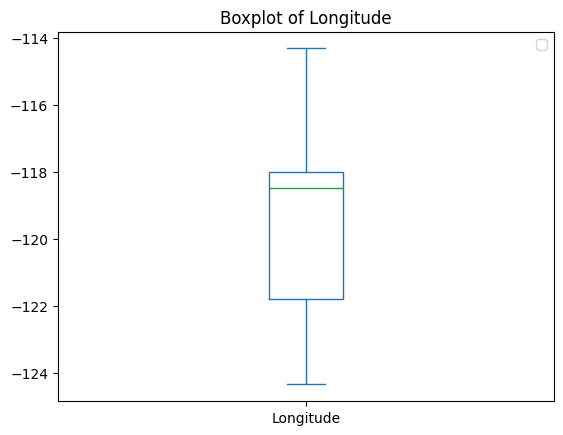

In [149]:
df_Copy['Longitude'].plot(kind='box', label = 'Longitude')
plt.title("Boxplot of Longitude")
plt.legend()
plt.show()



---

#MedHouseValue(Univariate)

In [150]:
df_Copy['MedHouseValue'].describe()

,MedHouseValue
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


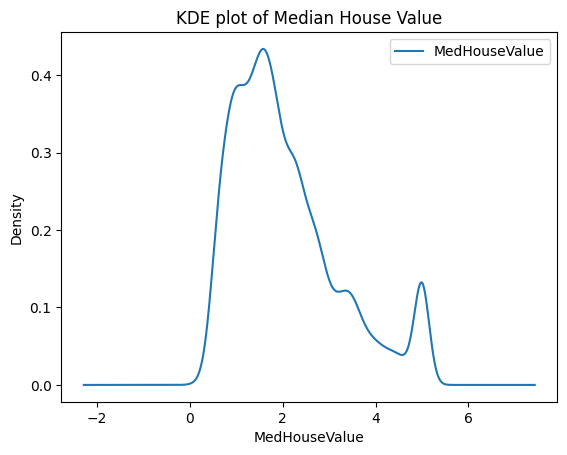

In [151]:
df_Copy['MedHouseValue'].plot(kind='kde')
plt.title("KDE plot of Median House Value")
plt.xlabel('MedHouseValue')
plt.legend()
plt.show()

In [152]:
df_Copy['MedHouseValue'].skew()

np.float64(0.9777632739098345)

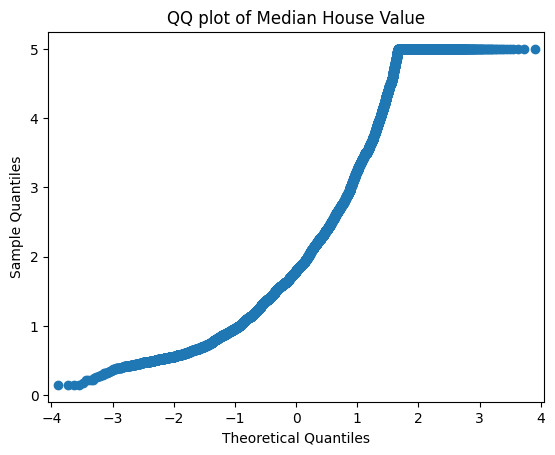

In [153]:
sm.qqplot(df_Copy['MedHouseValue'])
plt.title('QQ plot of Median House Value')
plt.show()

/tmp/ipython-input-3398891216.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


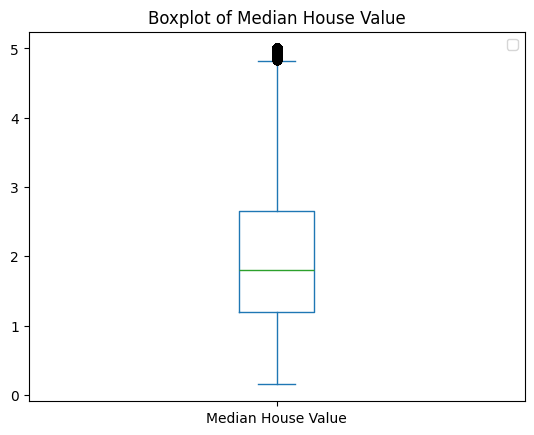

In [154]:
df_Copy['MedHouseValue'].plot(kind='box', label = 'Median House Value')
plt.title("Boxplot of Median House Value")
plt.legend()
plt.show()




---
#Bivariate Analysis Conclusion
1. We can Observe that there is a positive moderate correlaton with MedInc
2. Very Week positive correlation with HouseAge and AveRooms
3. Very Weak negative correlation with AveBedrms, Population, AveOccup, Latitude and Longitude.

##Conclusion

1. Places where Income was high - House Value was also high
2. HouseAge AveRooms, AveBedrms, Population, AveOccup, Latitude and Longitude - there was no such major correlation with the value of house




---


#MedInc - MedHouseValue(Bivariate)

In [155]:
df_Copy

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


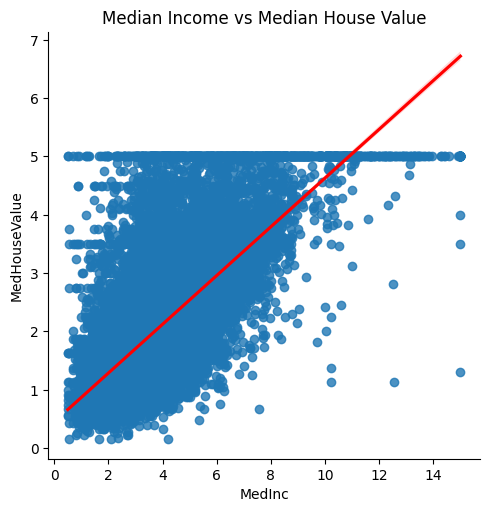

In [156]:
sns.lmplot(x='MedInc', y='MedHouseValue', data=df_Copy, line_kws={'color':'red'})
plt.title('Median Income vs Median House Value')
plt.show()

In [157]:
df_Copy['MedHouseValue'].corr(df_Copy['MedInc'])

np.float64(0.6880752079585475)



---


#HouseAge-MedHouseValue(Bivariate)

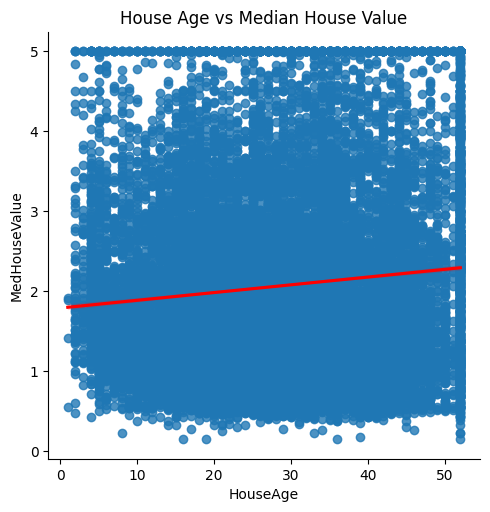

In [158]:
sns.lmplot(x='HouseAge', y='MedHouseValue', data=df_Copy, line_kws={'color':'red'})
plt.title('House Age vs Median House Value')
plt.show()

In [159]:
df_Copy['MedHouseValue'].corr(df_Copy['HouseAge'])

np.float64(0.10562341249320989)

#AveRooms-MedHouseValue(Bivariate)

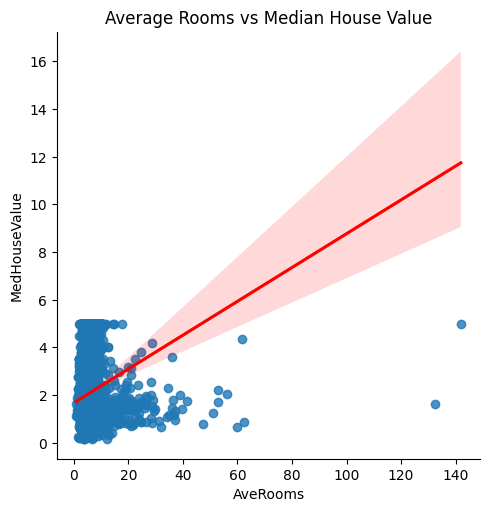

In [160]:
sns.lmplot(x='AveRooms', y='MedHouseValue', data=df_Copy, line_kws={'color':'red'})
plt.title('Average Rooms vs Median House Value')
plt.show()

In [161]:
df_Copy['MedHouseValue'].corr(df_Copy['AveRooms'])

np.float64(0.15194828974145774)

#AveBedrms-MedHouseValue(Bivariate)

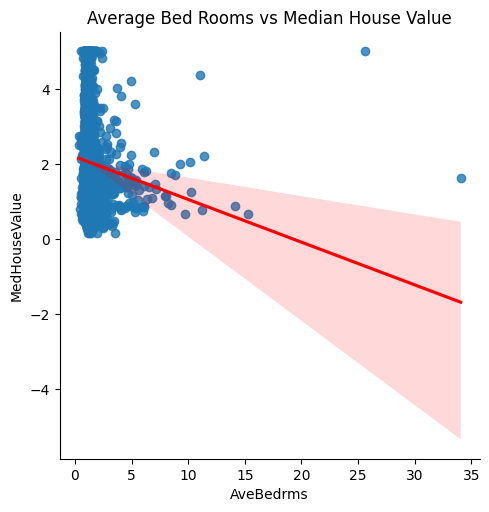

In [162]:
sns.lmplot(x='AveBedrms', y='MedHouseValue', data=df_Copy, line_kws={'color':'red'})
plt.title('Average Bed Rooms vs Median House Value')
plt.show()

In [163]:
df_Copy['MedHouseValue'].corr(df_Copy['AveBedrms'])

np.float64(-0.04670051296948685)

#Population-MedHouseValue(Bivariate)

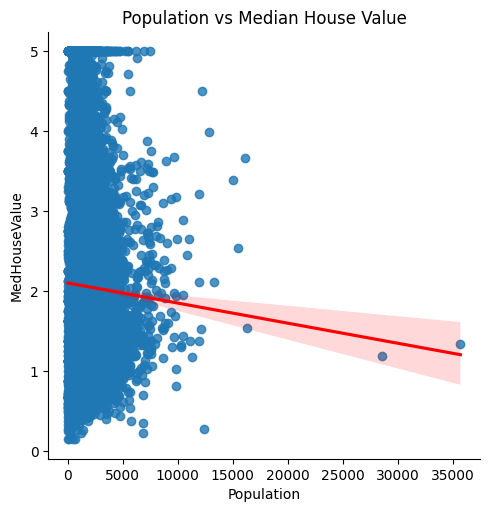

In [164]:
sns.lmplot(x='Population', y='MedHouseValue', data=df_Copy, line_kws={'color':'red'})
plt.title('Population vs Median House Value')
plt.show()

In [165]:
df_Copy['MedHouseValue'].corr(df_Copy['Population'])

np.float64(-0.024649678888894886)

#AveOccup-MedHouseValue(Bivariate)

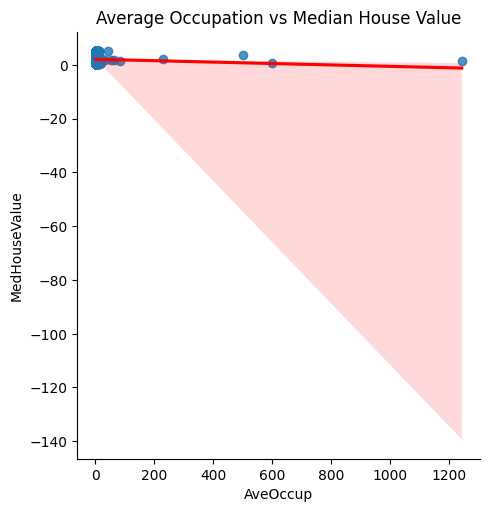

In [166]:
sns.lmplot(x='AveOccup', y='MedHouseValue', data=df_Copy, line_kws={'color':'red'})
plt.title('Average Occupation vs Median House Value')
plt.show()

In [167]:
df_Copy['MedHouseValue'].corr(df_Copy['AveOccup'])

np.float64(-0.023737412956134345)

#Latitude-MedHouseValue(Bivariate)

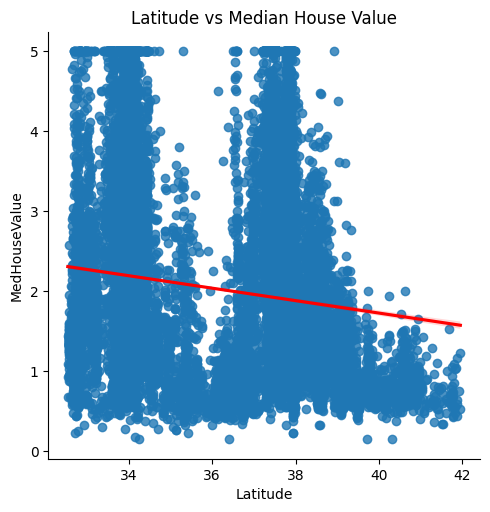

In [168]:
sns.lmplot(x='Latitude', y='MedHouseValue', data=df_Copy, line_kws={'color':'red'})
plt.title('Latitude vs Median House Value')
plt.show()

In [169]:
df_Copy['MedHouseValue'].corr(df_Copy['Latitude'])

np.float64(-0.1441602768746593)

#Longitude-MedHouseValue(Bivariate)

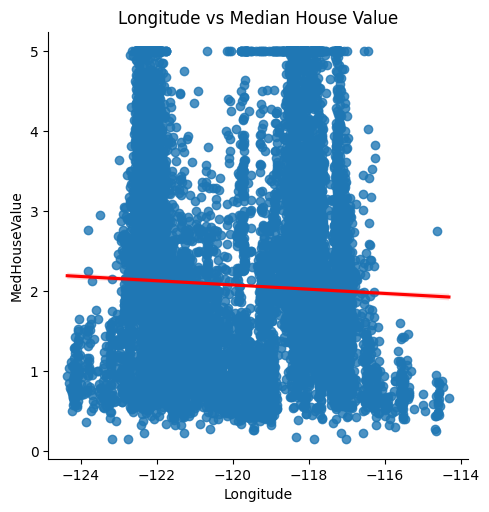

In [170]:
sns.lmplot(x='Longitude', y='MedHouseValue', data=df_Copy, line_kws={'color':'red'})
plt.title('Longitude vs Median House Value')
plt.show()

In [171]:
df_Copy['MedHouseValue'].corr(df_Copy['Longitude'])

np.float64(-0.045966615117978546)

#Feature Engineering

In [172]:
f"duplicated values are {df.duplicated().sum()}"

'duplicated values are 0'

In [173]:
f"null values are {df_Copy.isnull().sum().sum()}"

'null values are 0'

In [181]:
class Outliers:
  def __init__(self, df):
    self.df = df
    self.apply_to_all()


  def handling_skewed(self, col):
    self.Q1 = df[col].quantile(0.25)
    self.Q3 = df[col].quantile(0.75)
    self.IQR = self.Q3 - self.Q1
    self.upper_limit = self.Q3 + 1.5*self.IQR
    self.lower_limit = self.Q1 - 1.5*self.IQR
    self.df[col] = np.where(
        self.df[col] > self.upper_limit, self.upper_limit,
        np.where(self.df[col]< self.lower_limit, self.lower_limit, self.df[col])
    )
    return self.df


  def handling_not_skewed(self, col):
    self.mean = df[col].mean()
    self.std = df[col].std()
    self.upper_limit = self.mean + 3*self.std
    self.lower_limit = self.mean - 3*self.std
    self.df[col] = np.where(
        self.df[col] > self.upper_limit, self.upper_limit,
        np.where(self.df[col]< self.lower_limit, self.lower_limit, self.df[col])
    )
    return self.df

  def apply_to_all(self, skew_threshold=0.5):
    numeric_cols = self.df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
      skewness = self.df[col].skew()
      if abs(skewness) > skew_threshold:
        self.handling_skewed(col)
      else:
        self.handling_not_skewed(col)
        return self.df


In [182]:
outlier = Outliers(df_Copy)

In [183]:
X = df_Copy.drop('MedHouseValue', axis=1)
y = df_Copy['MedHouseValue']

In [184]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
PT = PowerTransformer(method='yeo-johnson')
X[numeric_cols] = PT.fit_transform(X[numeric_cols])

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
X_top = X[selected_features]

In [189]:
X_top

,MedInc,AveRooms,Population,AveOccup,Latitude
0,2.032296,1.106394,-1.619967,-0.368763,1.089037
1,2.032296,0.712367,1.090355,-1.186265,1.082404
2,1.768880,1.673645,-1.139853,0.005053,1.079079
3,1.119252,0.461045,-1.000270,-0.381080,1.079079
4,0.189397,0.737176,-0.985268,-1.040230,1.079079
...,...,...,...,...,...
20635,-1.649221,-0.069032,-0.476559,-0.360617,1.555813
20636,-0.709009,0.640650,-1.512730,0.426994,1.558372
20637,-1.498279,0.049281,-0.239419,-0.764455,1.542961
20638,-1.327106,0.137692,-0.647855,-1.158527,1.542961


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

In [191]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [192]:
y_pred = model.predict(X_test)

In [193]:
mse = mean_squared_error(y_test, y_pred)
mse

0.6334799473397498

In [194]:
r2 = r2_score(y_test, y_pred)
r2

0.516578443937299